# Advanced Business Analytics (CIS442D)

## Homework Assignment 4
### Due date: 2/9/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

# Exercise 1
Based on exercise 7 in Chapter 9 in "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani (<a href="http://www-bcf.usc.edu/~gareth/ISL/">Download</a>)

In this problem, you will use various classification algorithms in order to
predict whether a given car gets high or low gas mileage based on the data in the file 'Auto.csv'.
1. Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.
2. Fit a support vector classifier to the data with various values
of the parameter C, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC">LinearSVC</a>)
3. Fit a classification tree to the data with various values
of the parameters max_depth and min_samples_leaf, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of thes parametere. Comment on your results. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a>)
4. Fit a random forest to the data with various values
of the parameters tree depth, number of estimators, and maximal featuers, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different
values of thes parameters. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a>)
5. Make some plots to back up your assertions in (2)-(4).

In [1]:
#Exercise 1
#1. Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas 
#mileage below the median.

import pandas as pd
auto = pd.read_csv("Auto.csv").dropna()
auto.head()
auto.describe()
auto['mileage']=(auto['mpg']>=23).astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [3]:
#2. Fit a support vector classifier to the data with various values of the parameter C, in order to predict whether a 
#car gets high or low gas mileage. Report the cross-validation errors associated with different values of this 
#parameter. Comment on your results.

import numpy as np
import sklearn
import pandas as pd
from sklearn import svm # read more at: scikit-learn.org
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

#remove NAs in "horsepower" column and convert "horsepower" column from string to float.
auto.loc[auto['horsepower'] == "?"]
auto=auto[auto['horsepower'] != "?"]
auto.ix[:,3].astype('float64')

#build a classification and get cross validation error using different C values
X_labels = [cname for cname in auto.columns if cname not in ['mpg','mileage','name']]
X = auto.ix[:,X_labels]
Y = auto['mileage']

results=[]
for i in np.logspace(-3, 1, 10):
    clf = svm.SVC(kernel='linear',C=i)
    fit = clf.fit(X, Y)
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append([i,scores.mean(), scores.std()])
    
accuracy = pd.DataFrame(data=results,columns=['C','mean','std'])
accuracy


,C,mean,std
0,0.001000,0.902949,0.026707
1,0.002783,0.882821,0.040213
2,0.007743,0.877949,0.045943
3,0.021544,0.875513,0.059469
4,0.059948,0.870577,0.075124
5,0.166810,0.862949,0.077926
6,0.464159,0.865385,0.070221
7,1.291550,0.862949,0.083229
8,3.593814,0.877949,0.058529
9,10.000000,0.855513,0.099730


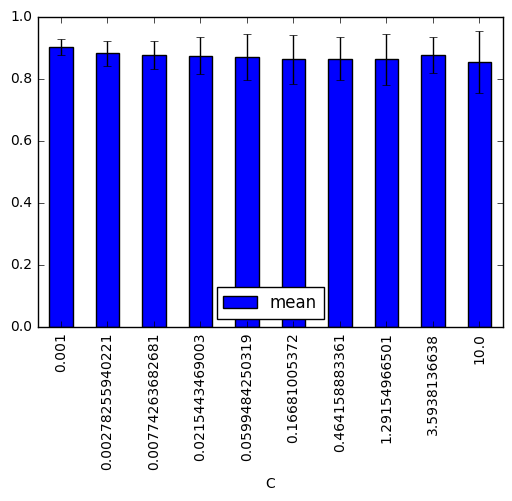

In [4]:
#draw a graph
accuracy.plot.bar(x='C',y='mean',yerr='std')

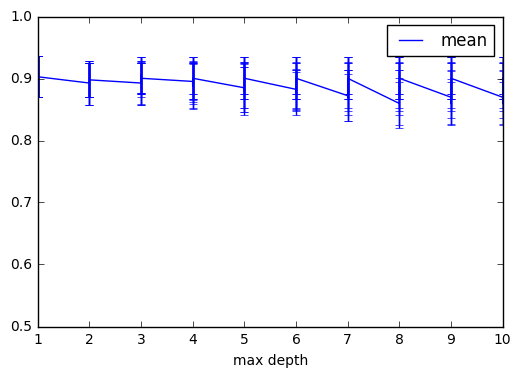

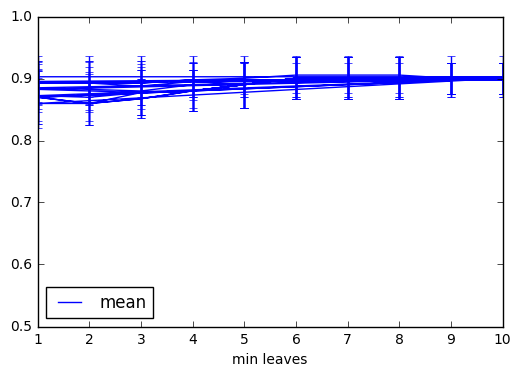

In [13]:
#3.Fit a classification tree to the data with various values of the parameters max_depth and min_samples_leaf, in 
#order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with 
#different values of thes parametere. Comment on your results. 
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from IPython.display import Image 
from IPython.display import IFrame 

results1=[]
for i in range(1,11):
    for j in range(1,11):
        clf1 = tree.DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        clf1 = clf1.fit(X,Y)
        scores1 = cross_val_score(clf1, X, Y, cv=5)
        results1.append([i,j,scores1.mean(), scores1.std()])
    
accuracy1 = pd.DataFrame(data=results1,columns=['max depth','min leaves','mean','std'])
accuracy1

#draw graphs: showing accuracy
accuracy1.plot(x='max depth',y='mean',yerr='std', ylim=[0.5,1])
accuracy1.plot(x='min leaves',y='mean',yerr='std', ylim=[0.5,1])


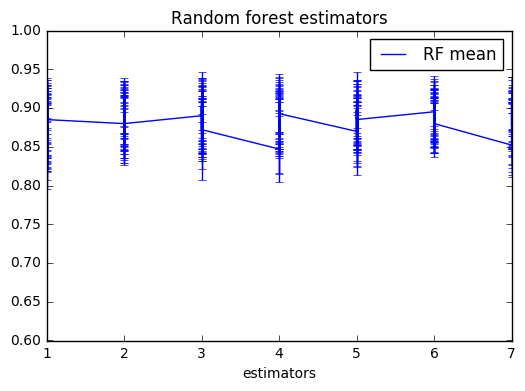

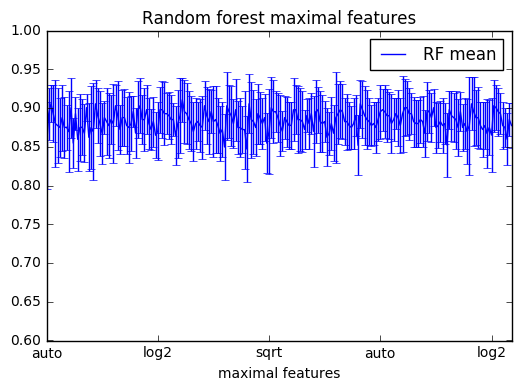

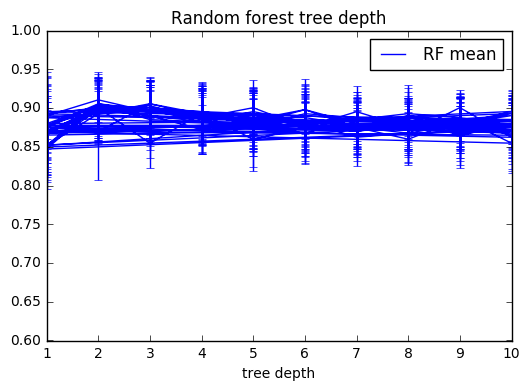

In [12]:
#4.Fit a random forest to the data with various values of the parameters tree depth, number of estimators, and maximal
#featuers, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors 
#associated with different values of thes parameters. (see RandomForestClassifier)
results2=[]
feature_range = ["auto","sqrt","log2"]
for i in range(1,8):
    for j in feature_range:
        for k in range(1,11):
            clf_rf = RandomForestClassifier(max_features=j, n_estimators=i, max_depth=k)
            clf_rf_scores = cross_val_score(clf_rf, X, Y, cv=5)
            results2.append((i,j,k,clf_rf_scores.mean(),clf_rf_scores.std()))
    
accuracy2 = pd.DataFrame(data=results2,columns=['estimators','maximal features','tree depth','RF mean','RF std'])
accuracy2

#draw graphs: showing accuracy
accuracy2.plot(x='estimators',y='RF mean',yerr='RF std',ylim=[0.6,1],title='Random forest estimators')
accuracy2.plot(x='maximal features',y='RF mean',yerr='RF std',ylim=[0.6,1],title='Random forest maximal features')
accuracy2.plot(x='tree depth',y='RF mean',yerr='RF std',ylim=[0.6,1],title='Random forest tree depth')



In [ ]:
#5.I hava drawn illustrating graphs in questions 3-5. See above.

# Exercise 2: 
Chapter 8, exercise 1 in "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani (<a href="http://www-bcf.usc.edu/~gareth/ISL/">Download</a>)


In [6]:
# write solution here
#Draw an example (of your own invention) of a partition of two- dimensional feature space that could result from 
#recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to 
#this partition. Be sure to label all aspects of your figures, including the regions R1, R2, . . ., the cutpoints 
#t1,t2,..., and so forth. Hint: Your result should look something like Figures 8.1 and 8.2.

#classification tree

#       [  X<40 ] 
#        |       |
#    [Y<75]    [X<75]
#    |   |     |    |
# [X<20] R2    R1   [Y<25]
# |    |            |    |
# R6   R5           R4   R3





# Optional coding assignment
This is an __optional__ exercise, which will be graded and counted towards the class participation component of your grade (it could only improve your grade).

Read the first chapter in https://automatetheboringstuff.com/chapter2/ and solve the practice quetsions appearing at the end of the chapter.

In [ ]:
# Solution to Q1

In [ ]:
# Solution to Q2

In [ ]:
# Solution to Q3

In [ ]:
# Solution to Q4

In [ ]:
# Solution to Q5

In [ ]:
# Solution to Q6

In [ ]:
# Solution to Q7

In [ ]:
# Solution to Q8

In [ ]:
# Solution to Q9

In [ ]:
# Solution to Q10

In [ ]:
# Solution to Q11

In [ ]:
# Solution to Q12

In [ ]:
# Solution to Q13

In [ ]:
# Solution to Q14